---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

<IPython.core.display.Javascript object>


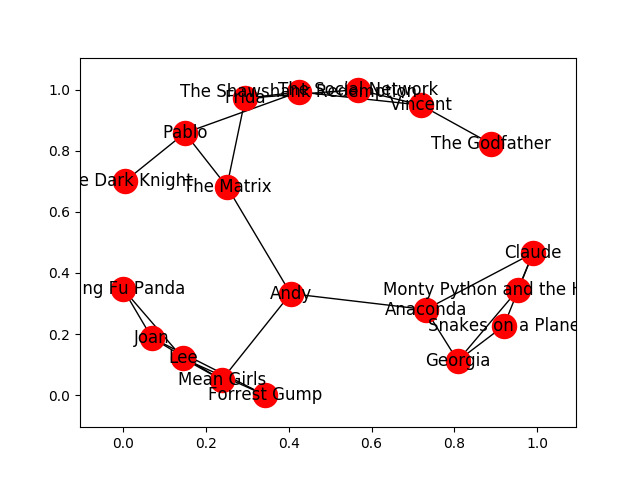

In [116]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);
plot_graph(answer_one())

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [72]:
def answer_one():
    import numpy as np
    with open('Employee_Movie_Choices.txt') as f:
        lines = f.readlines()
    myList = [line.split("\t") for line in lines]
    edges=[]
    for i in myList:
        edges.append([i[0],i[1][:-1]])
    del edges[0]
    edges=np.array(edges)
    g = nx.Graph()
    g.add_nodes_from(edges[:,0],bipartite=0)
    g.add_nodes_from(edges[:,1],bipartite=1)
    g.add_edges_from(edges)
    
        
    
    return g


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [73]:
def answer_two():
    
    g=answer_one()
    attr={'Anaconda': 'movie','Andy': 'employee','Claude': 'employee',
    'Forrest Gump': 'movie','Frida': 'employee','Georgia': 'employee','Joan': 'employee',
    'Kung Fu Panda': 'movie','Lee': 'employee','Mean Girls': 'movie',
    'Monty Python and the Holy Grail': 'movie',
    'Pablo': 'employee',
    'Snakes on a Plane': 'movie','The Dark Knight': 'movie','The Godfather': 'movie','The Matrix': 'movie','The Shawshank Redemption': 'movie',
    'The Social Network': 'movie',
    'Vincent': 'employee'}

    
    return g


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [119]:
def answer_three():
        
    g=answer_two()
    P=bipartite.weighted_projected_graph(g,employees)
    
    return P


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [155]:
def answer_four():
    import numpy as np
    with open('Employee_Relationships.txt') as f:
        lines = f.readlines()
    myList = [line.split("\t") for line in lines]
    edges=[]
    wieght=[]
    for i in myList:
        edges.append([i[0],i[1]])
        wieght.append(i[2][:-1])
    edges=np.array(edges)
    g = nx.Graph()
    s=-1
    for i in edges:
        s+=1
        g.add_edge(i[0],i[1],wieght=wieght[s])
    
    data1=g.edges(data=True)
    g1=answer_three()##the project graph
    data=g1.edges(data=True)
    relation_final=[]
    df=pd.DataFrame()
    for i in data1:
        common_movies=0
        wieght=i[2]['wieght']
        for a in data:
            if (i[0],i[1])==(a[0],a[1]) or (i[1],i[0])==(a[1],a[0]) or (i[1],i[0])==(a[0],a[1]):
                common_movies=a[2]['weight']
        relation_final.append([int(wieght),int(common_movies)])
    relation_final=np.array(relation_final)
    df["wieght"]=relation_final[:,0]
    df["common_movies"]=relation_final[:,1]
    return df.corr()


[('Joan', 'Andy', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Andy', 'Lee', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Vincent', 'Frida', {'weight': 2}), ('Vincent', 'Pablo', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2})]
[('Andy', 'Claude', {'wieght': '0'}), ('Andy', 'Frida', {'wieght': '20'}), ('Andy', 'Georgia', {'wieght': '-10'}), ('Andy', 'Joan', {'wieght': '30'}), ('Andy', 'Lee', {'wieght': '-10'}), ('Andy', 'Pablo', {'wieght': '-10'}), ('Andy', 'Vincent', {'wieght': '20'}), ('Claude', 'Frida', {'wieght': '0'}), ('Claude', 'Georgia', {'wieght': '90'}), ('Claude', 'Joan', {'wieght': '0'}), ('Claude', 'Lee', {'wieght': '0'}), ('Claude', 'Pablo', {'wieght': '10'}), ('Claude', 'Vincent', {'wieght': '0'}), ('Frida', 'Georgia', {'wieght': '0'}), ('Frida', 'Joan', {'wieght': '0'}), ('Frida', 'Lee', {'wieght': '0'}), ('Frida', '

,wieght,common_movies
wieght,1.000000,0.788396
common_movies,0.788396,1.000000
